<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2021/week_21/TidyTuesday_Ask_A_Manger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages and Data

In [51]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-18/survey.csv')

df.head()

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


# Cleaning

In [65]:
# Simple cleaning

# Desired order. We will reindex using this list.
reorder = ['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or over']

# Find total number of respondents in each age group
df_clean = (df.
 groupby('how_old_are_you').
 count().
 reindex(reorder).
 reset_index()[['how_old_are_you', 'timestamp']].
 rename(columns = {'timestamp':'num_responses'}))

df_clean['colors'] = np.where(df_clean['num_responses'] == df_clean['num_responses'].max(), '#69A2B0', 'grey')

# Inspect
df_clean

,how_old_are_you,num_responses,colors
0,under 18,10,grey
1,18-24,1015,grey
2,25-34,11748,#69A2B0
3,35-44,9398,grey
4,45-54,3042,grey
5,55-64,931,grey
6,65 or over,88,grey


# Plotting

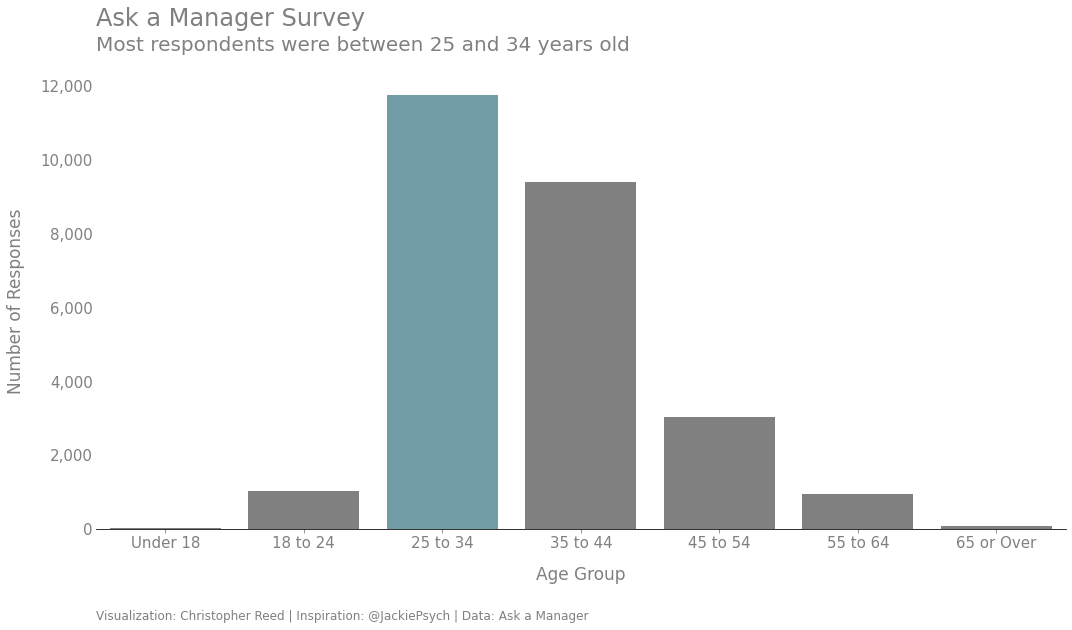

In [82]:
# Make palette (dictionary) using two columns
palette = dict(zip(df_clean['how_old_are_you'], df_clean['colors']))


# Create fig and ax
fig, ax = plt.subplots(figsize = (15, 9))

###############
## MAIN PLOT ##
###############

sns.barplot(x = 'how_old_are_you',
            y = 'num_responses',
            palette = palette,
            data = df_clean)

#######################
## TITLES AND LABELS ##
#######################
ax.text(x = 0, y = 1.105,
        s = 'Ask a Manager Survey',
        fontsize = 24,
        color = 'grey',
        transform = ax.transAxes)

ax.text(x = 0, y = 1.05,
        s = 'Most respondents were between 25 and 34 years old',
        fontsize = 20,
        color = 'grey',
        transform = ax.transAxes)

ax.set_xlabel('Age Group',
              fontsize = 17,
              labelpad = 15,
              color = 'grey')
ax.set_ylabel('Number of Responses',
              fontsize = 17,
              labelpad = 15,
              color = 'grey')

#############
## CREDITS ##
#############

ax.text(x = 0, y = -0.2,
        s = 'Visualization: Christopher Reed | Inspiration: @JackiePsych | Data: Ask a Manager',
        color = 'grey',
        fontsize = 12,
        transform = ax.transAxes,)

####################
## TICKS AND AXES ##
####################

# X tick labels
labels = ['Under 18', '18 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 or Over']
ax.set_xticklabels(labels)

 # Tick params
ax.tick_params(labelsize = 15, colors = 'grey')
ax.tick_params(axis = 'y', length = 0)

# Format y-axis as percent
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Despine 
ax = sns.despine(left = True)

# Tight
plt.tight_layout()

############
## SAVING ##
############

# filename = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# plt.savefig('/content/drive/MyDrive/TidyTuesday/Ask a Manager/Images/' + filename, bbox_inches = 'tight')
plt.savefig('Ask a Manager Low Res', facecolor = 'black', bbox_inches = 'tight')

# Making of GIF

In [83]:
import imageio
import os
images = []
for filename in os.listdir('/content/drive/MyDrive/TidyTuesday/Ask a Manager/Images'):
    images.append(imageio.imread('/content/drive/MyDrive/TidyTuesday/Ask a Manager/Images/' + filename))

imageio.mimsave('Ask a Manager: Making Of.gif', images, duration = 0.5)